In [10]:
import numpy as np
import cv2
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
base_img = cv2.imread('../data/raw/daniel_craig.jpg')
base_img = imutils.resize(base_img, width=500)

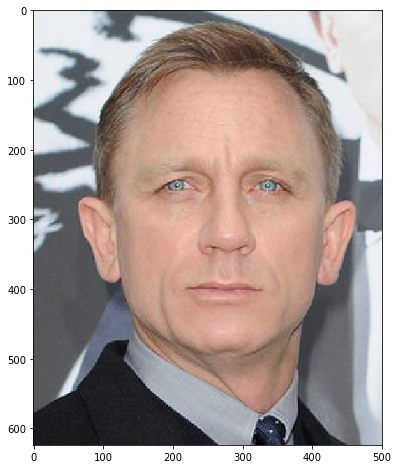

In [140]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB))
plt.show()

In [141]:
base_img.shape

(624, 500, 3)

In [142]:
shades_img = cv2.imread('../data/accessories/glasses.png',-1)
shades_img = imutils.resize(shades_img, width=250)

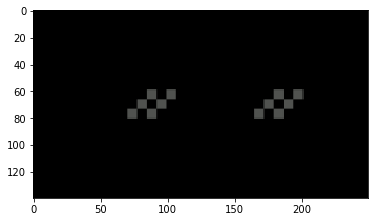

In [143]:
plt.imshow(cv2.cvtColor(shades_img, cv2.COLOR_BGR2RGB))
plt.show()

In [144]:
# Overlaying the shades on the face
img_cpy = base_img.copy()

In [145]:
sh_cpy = shades_img.copy()

In [146]:
roi_color = img_cpy
# Create the mask for the mustache
mask = sh_cpy[:,:,3]

# Create the inverted mask for the mustache
mask_inv = cv2.bitwise_not(orig_mask)
 
# Convert mustache image to BGR
# and save the original image size (used later when re-sizing the image)

In [147]:
# sh_cpy[sh_cpy==0] = 255

In [148]:
y1 = 200
y2 = 200+sh_cpy.shape[0]
x1 = 150
x2 = 150+sh_cpy.shape[1]

In [149]:
# take ROI for mustache from background equal to size of mustache image
roi = roi_color[y1:y2, x1:x2]

# roi_bg contains the original image only where the mustache is not
# in the region that is the size of the mustache.
roi_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# roi_fg contains the image of the mustache only where the mustache is
roi_fg = cv2.bitwise_and(shades_img[:,:,0:3],shades_img[:,:,0:3],mask = mask)

# join the roi_bg and roi_fg
dst = cv2.add(roi_bg,roi_fg)

# place the joined image, saved to dst back over the original image
roi_color[y1:y2, x1:x2] = dst


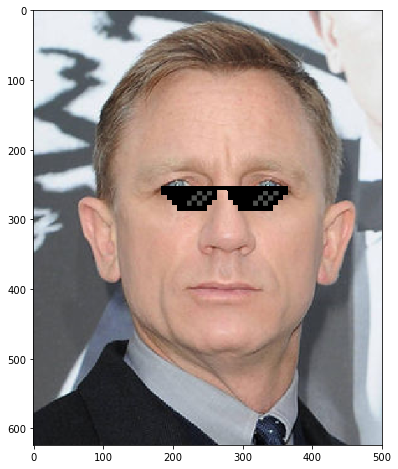

In [150]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.show()